In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# Assignment5


Tasks

1.Find the linear regression equation for this data.

2.Chart the original data and the equation on the chart.

3.Find the equation's  R2  score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

4.Extrapolate data: If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?

5.Interpolate data: With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.
 What was the approximate ground temperature that morning?

## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

In [ ]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)

In [ ]:
x = df['Chirps/Second']
x = x.to_frame()
y = df['Ground Temperature']
print(x)
print(y)

    Chirps/Second
0            20.0
1            16.0
2            19.8
3            18.4
4            17.1
5            15.5
6            14.7
7            15.7
8            15.4
9            16.3
10           15.0
11           17.2
12           16.0
13           17.0
14           14.4
0     88.6
1     71.6
2     93.3
3     84.3
4     80.6
5     75.2
6     69.7
7     71.6
8     69.4
9     83.3
10    79.6
11    82.6
12    80.6
13    83.5
14    76.3
Name: Ground Temperature, dtype: float64


In [ ]:
print(x.shape)
x.head()

(15, 1)


,Chirps/Second
0,20.0
1,16.0
2,19.8
3,18.4
4,17.1


In [ ]:
x.describe()

,Chirps/Second
count,15.000000
mean,16.566667
std,1.712837
min,14.400000
25%,15.450000
50%,16.000000
75%,17.150000
max,20.000000


In [ ]:
x.Chirps_Second.quantile(0.75)

17.15

In [ ]:
x.Chirps_Second.quantile(0.25)

15.45

In [ ]:
iqr = x.Chirps_Second.quantile(0.75) - x.Chirps_Second.quantile(0.25)
upper_threshold = x.Chirps_Second.quantile(0.75) + (1.5 * iqr)
lower_threshold = x.Chirps_Second.quantile(0.25) - (1.5 * iqr)
print(upper_threshold)
print(lower_threshold)

19.699999999999996
12.9


# **values greater than q3 + 1.5iqr -> outlier values less than q1 - 1.5iqr -> outlier**

In [ ]:
x.isnull().sum()

Chirps_Second    0
dtype: int64

In [ ]:
x = df.drop_duplicates()
x.shape

(15, 2)

In [ ]:
x.dtypes

Chirps/Second         float64
Ground Temperature    float64
dtype: object

### 1) Is there any relationship between the feature and target - Yes 2) Is there any linear relationship between the feature and target - Yes 3) No transformation is required

In [ ]:
x.corr()

,Chirps/Second,Ground Temperature
Chirps/Second,1.000000,0.832042
Ground Temperature,0.832042,1.000000


There is a linear relationship between Chirps_Second and Ground Temperature
 => we can go ahead and develop a linear regression model. No transformation required.


In [ ]:
x.rename(columns ={'Ground Temperature':'Ground_Temperature'},inplace=True)
x

,Chirps/Second,Ground_Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6
5,15.5,75.2
6,14.7,69.7
7,15.7,71.6
8,15.4,69.4
9,16.3,83.3


In [ ]:
x

,Chirps/Second,Ground_Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6
5,15.5,75.2
6,14.7,69.7
7,15.7,71.6
8,15.4,69.4
9,16.3,83.3


In [ ]:
x.Ground_Temperature.values

array([88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7, 71.6, 69.4, 83.3, 79.6,
       82.6, 80.6, 83.5, 76.3])

Preparing the data

In [ ]:
X = df.loc[:,['Chirps/Second']].values # select all rows and select all columns except the last column as my feature
y = df.loc[:, 'Ground Temperature'].values # target as arrays
# Syntax : dataset.loc[:, :-1]
from sklearn.model_selection import train_test_split #import the required function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
y_test

array([80.6, 88.6, 93.3, 71.6, 69.7])

In [ ]:
X_train.shape, X_test.shape

((10, 1), (5, 1))

In [ ]:
X_test

array([[17.1],
       [20. ],
       [19.8],
       [15.7],
       [14.7]])

In [ ]:
from sklearn.linear_model import LinearRegression #importing all the required functions
regressor = LinearRegression() # spredicted score = m * hours + c  
"Symtax : varName = ModelName(modelHyperParams)"
regressor.fit(X_train, y_train) #Learning happens - GD is done and we get the final values of m and c

LinearRegression()

In [ ]:
print(regressor.intercept_) # c

33.29824618382592


In [ ]:
print(regressor.coef_) # slope - m

[2.81276388]


In [ ]:
regressor.predict([[7.5]])

array([54.39397532])

In [ ]:
y_pred = regressor.predict(X_test) # given the features of the test dataset, it will give the final predictions
"Syntax : varName.predict(test_features)"
y_pred

array([81.39650861, 89.55352387, 88.99097109, 77.45863917, 74.64587528])

In [ ]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1

,Actual,Predicted
0,80.6,81.396509
1,88.6,89.553524
2,93.3,88.990971
3,71.6,77.458639
4,69.7,74.645875


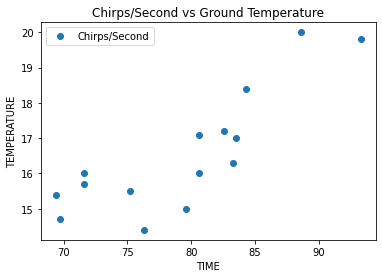

In [ ]:
df.plot(y='Chirps/Second', x='Ground Temperature', style='o')
plt.title('Chirps/Second vs Ground Temperature')
plt.xlabel('TIME')
plt.ylabel('TEMPERATURE')

plt.show()

In [ ]:
regressor.predict([[12]]) # perils of extrapolation

array([67.0514128])

# **Metrics**

In [ ]:
from sklearn import metrics 
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))
regressor.score(X_test,y_test) # another way to get the r^2 values

R2- SCORE: 0.8143484768966703


0.8143484768966703

In [ ]:
Extrapolate=regressor.predict([[95]])
print("Extrapolate data:",Extrapolate)

Extrapolate data: [300.5108152]


In [ ]:
interpolate=(18 - regressor.intercept_) / regressor.coef_
print("Interpolate data:",interpolate)

Interpolate data: [-5.43886612]


# Assignment6

## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [ ]:
df = pd.read_fwf("brain_body.txt")


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Brain   62 non-null     float64
 1   Body    62 non-null     float64
dtypes: float64(2)
memory usage: 1.1 KB


In [ ]:
df.describe()

,Brain,Body
count,62.000000,62.000000
mean,198.789984,283.134194
std,899.158011,930.278942
min,0.005000,0.140000
25%,0.600000,4.250000
50%,3.342500,17.250000
75%,48.202500,166.000000
max,6654.000000,5712.000000


In [ ]:
df.head()

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5


In [ ]:
x = df['Body']
x = x.to_frame()
y = df['Brain']
print(x)
print(y)

     Body
0    44.5
1    15.5
2     8.1
3   423.0
4   119.5
..    ...
57  169.0
58    2.6
59   11.4
60    2.5
61   50.4

[62 rows x 1 columns]
0       3.385
1       0.480
2       1.350
3     465.000
4      36.330
       ...   
57    160.000
58      0.900
59      1.620
60      0.104
61      4.235
Name: Brain, Length: 62, dtype: float64


In [ ]:
from sklearn.linear_model import LinearRegression #importing all the required functions
regressor = LinearRegression()
regressor.fit(x, y)

LinearRegression()

In [ ]:
print('intercept:', regressor.intercept_)
print('coefficient:', regressor.coef_)

intercept: -56.85554542859637
coefficient: [0.90291295]


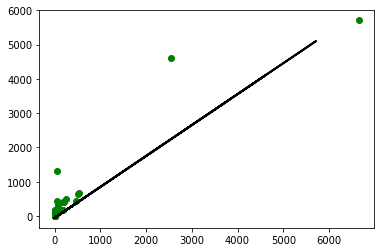

In [ ]:
plt.scatter(y, x, color='green')
plt.plot(x, regressor.predict(x), color='black', linewidth=2)

In [ ]:
print('r-squared: ', regressor.score(x, y))


r-squared:  0.8726620843043331


# Assignment7

## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary.

In [ ]:
df = pd.read_fwf("salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])

In [ ]:
feature = ['Sex', 'Rank', 'Year', 'Degree', 'YSdeg']
x = df[feature]
y = df.Salary

In [ ]:
regressor = LinearRegression()
regressor.fit(x, y)

LinearRegression()

In [ ]:
print('r-squared: ', regressor.score(x, y))

r-squared:  0.8547180674410969


In [ ]:
print('Features & Coefficients')
print(list(zip(feature, regressor.coef_)))

Features & Coefficients
[('Sex', 1241.792499601427), ('Rank', 5586.1814495214385), ('Year', 482.85976782882153), ('Degree', -1331.6440634059095), ('YSdeg', -128.79057354486122)]
